In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
from sklearn.metrics import  f1_score
import os
import seaborn as sns

In [2]:
def load_datasets(p1, 
                     groundtruth=True, cont_bern=True, relaxed_bern=True, 
                     mult_norm=True, dist_matching=True, original_postcode=True):
    
    output_name = 'decoded_spots_all_fovs_dropout_%.1f.csv'%p1
       
        
    # Load dataset
    all_dfs = []
    all_names = []

    if groundtruth:
        output_path = os.path.join('/data/Spots_barcode_Emily/dataset_3/output_expr_comparison/groundtruth/', 'decoded_spots_all_fovs_dropout_%.1f.csv'%p1)
        decoded_spots_df_groundtruth = pd.read_csv(output_path, index_col=0)
        # quick fix to df_groundtruth
        decoded_spots_df_groundtruth.predicted_id = decoded_spots_df_groundtruth.predicted_name

        all_dfs += [decoded_spots_df_groundtruth]
        all_names += ['groundtruth']

    if cont_bern:
        output_path = '/data/Spots_barcode_Emily/dataset_3/output_expr_comparison/continuous_bernoulli_2*R*C'
        decoded_spots_df_cont_bern = pd.read_csv(os.path.join(output_path,  output_name), index_col=0)

        all_dfs += [decoded_spots_df_cont_bern]
        all_names += ['cont_bern_2*R*C']
            
    if relaxed_bern:
        output_path = '/data/Spots_barcode_Emily/dataset_3/output_expr_comparison/relaxed_bernoulli_2*R*C'
        decoded_spots_df_relaxed_bern = pd.read_csv(os.path.join(output_path,  output_name), index_col=0)

        all_dfs += [decoded_spots_df_relaxed_bern]
        all_names += ['relaxed_bern_2*R*C']
    
    if mult_norm:
        output_path = '/data/Spots_barcode_Emily/dataset_3/output_expr_comparison/multivariate_normal'
        decoded_spots_df_multi_norm = pd.read_csv(os.path.join(output_path, output_name), index_col=0)

        all_dfs += [decoded_spots_df_multi_norm]
        all_names += ['multi_norm']

    if dist_matching:
        output_path = '/data/Spots_barcode_Emily/dataset_3/output_expr_comparison/distance_matching_euclidean'
        decoded_spots_df_distance_matching = pd.read_csv(os.path.join(output_path, output_name), index_col=0)

        all_dfs += [decoded_spots_df_distance_matching]
        all_names += ['distance_matching']
    
    if original_postcode:
        output_path = '/data/Spots_barcode_Emily/dataset_4/output_expr_comparison/original_postcode_old'
        decoded_spots_df_original_postcode = pd.read_csv(os.path.join(output_path, output_name), index_col=0)

        all_dfs += [decoded_spots_df_original_postcode]
        all_names += ['original_postcode']

    M = len(all_dfs)
    
    return M, all_dfs, all_names

In [3]:
def cal_F1_score_with_groundtruth(all_dfs, all_names, average_kind='weighted'):
    f1_score_list = []
    for i in tqdm(range(1, M)):
        score = f1_score(all_dfs[0].predicted_id, all_dfs[i].predicted_id, average=average_kind)
        f1_score_list.append(score)
    
    return f1_score_list

In [4]:
dropout_list = np.arange(0, 0.85, 0.1)

In [5]:
f1_list_big = []
for p1 in tqdm(dropout_list):
    output_name = 'decoded_spots_all_fovs_dropout_%.1f.csv'%p1

    M, all_dfs, all_names = load_datasets(p1)
    
    f1_list = cal_F1_score_with_groundtruth(all_dfs, all_names, average_kind='weighted')

    f1_list_big.append(f1_list)
    
f1_list_big = np.array(f1_list_big)


100%|████████████████████████████████████████████████████████████████████| 9/9 [16:02<00:00, 106.94s/it]


In [9]:
np. set_printoptions (precision=2, suppress=None)
df_f1_big_table = pd.DataFrame(f1_list_big.T, index=all_names[1:])
df_f1_big_table.columns = ["%.1f"%p1 for p1 in np.arange(0, 0.85, 0.1)]

<AxesSubplot:>

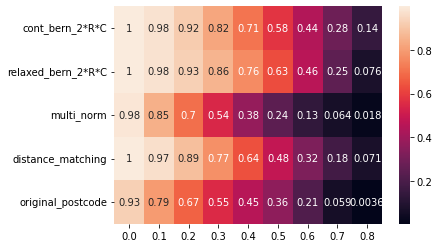

In [10]:
sns.heatmap(df_f1_big_table, annot=True)